_<h1 style="text-align: center;">Chapter II: Impact of Technology Analysis</h1>_

<br>

In this chapter we seek to analyze the performance of the tech sector relative to the S&P $500$ and the impact of tech on the S&P $500$. Specifically, we will answer:
1. How has the tech sector performed relative to the S&P $500$?
2. What are the impact of major tech stocks (e.g., FAANG)?

<br>

_<h3 style="text-align: center;">Section 2.1: Performance of the Tech Sector relative to the S&P $500$</h3>_

<br>

For this analysis, we must gather data for a tech-only ETF to compare it to the S&P $500$ (effectively comparing the tech sector to the more general market as a whole). For this, we consider XLK. This is the technology select sector SPDR fund which started in $1998$. Therefore, we will compare this ETF to the S&P $500$ starting from $1998$. 

                                Open       High        Low      Close  Volume  \
Date                                                                            
1998-12-22 00:00:00-05:00  24.211705  24.281748  23.744748  23.943205  300500   
1998-12-23 00:00:00-05:00  24.468533  24.515228  24.024924  24.515228  338300   
1998-12-24 00:00:00-05:00  24.515228  24.515228  24.328446  24.421837  243700   
1998-12-28 00:00:00-05:00  24.795396  24.795396  24.351788  24.491875  309300   
1998-12-29 00:00:00-05:00  24.608618  24.666987  24.281748  24.561922  123800   

                           Dividends  Stock Splits  Capital Gains  
Date                                                               
1998-12-22 00:00:00-05:00        0.0           0.0            0.0  
1998-12-23 00:00:00-05:00        0.0           0.0            0.0  
1998-12-24 00:00:00-05:00        0.0           0.0            0.0  
1998-12-28 00:00:00-05:00        0.0           0.0            0.0  
1998-12-29 00:00:00-05:0

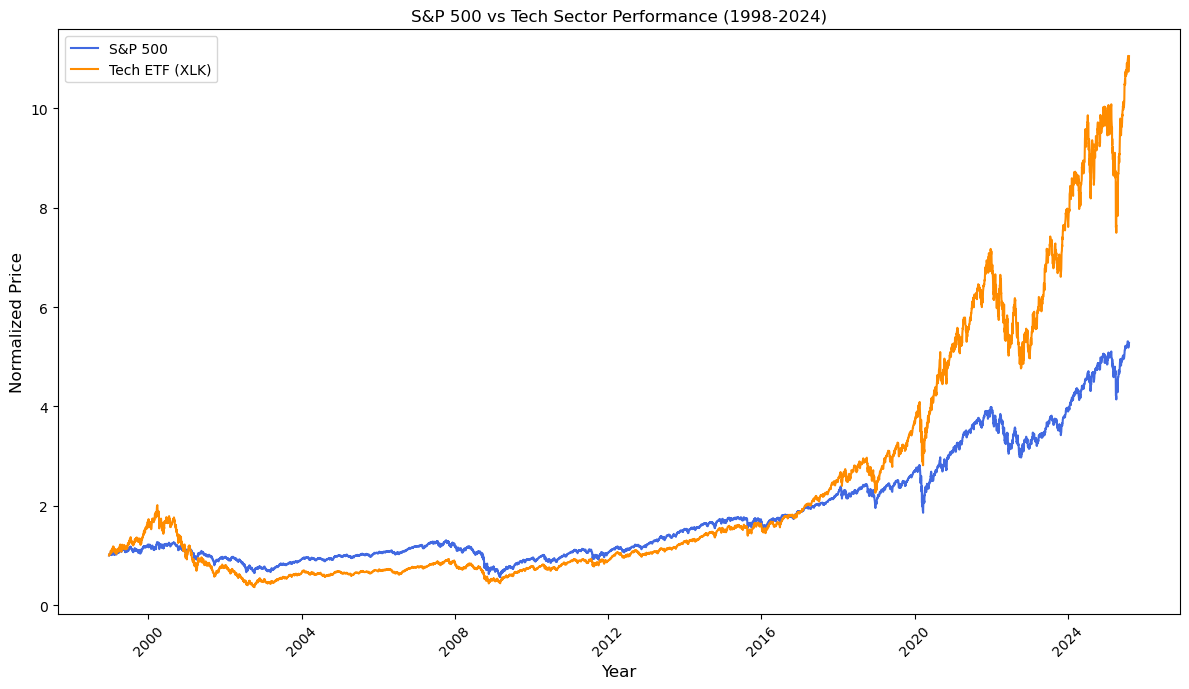

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
import seaborn as sns
import yfinance as yf
import matplotlib.dates as mdates

# First we need to download XLK Data from Yahoo Finance
tech = yf.Ticker('XLK')
df_tech = tech.history(period='max')

sp500 =  yf.Ticker('^GSPC')
df_sp500_2 = sp500.history(start='1998-12-22')

print(df_tech.head())
print(df_tech.info())
print(df_tech.columns)
print(df_tech.describe())

print(f"The number of unique 'Stock Splits' values are: {df_tech['Stock Splits'].nunique()}")
print(f"The number of unique 'Dividends' values are: {df_tech['Dividends'].nunique()}")
print(f"The number of unique 'Capital Gains' values are: {df_tech['Capital Gains'].nunique()}")

# Since 'Stock Splits' and 'Capital Gains' have only 1 unique value, which we can see is zero, then we note that they aren't providing useful information and can be removed from the dataframe
df_tech = df_tech.drop(columns=['Stock Splits', 'Capital Gains'])
print(df_tech.columns) # Verify the dropped columns

# Normalization is required to compare both funds from a coherent baseline (percentage change)
df_sp500_2['Normalized Close'] = df_sp500_2['Close'] / df_sp500_2['Close'].iloc[0]
df_tech['Normalized Close'] = df_tech['Close'] / df_tech['Close'].iloc[0]

# Graph the comparison
plt.figure(figsize=(12,7))
sns.lineplot(data=df_sp500_2, x=df_sp500_2.index, y='Normalized Close', label='S&P 500', color='royalBlue')
sns.lineplot(data=df_tech, x=df_tech.index, y='Normalized Close', label='Tech ETF (XLK)', color='darkorange')

plt.title("S&P 500 vs Tech Sector Performance (1998-2024)")
plt.xlabel('Year', fontsize=12)
plt.ylabel('Normalized Price', fontsize=12)
plt.legend(fontsize=10)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

We can see clearly that the tech sector begins to dominate the broader market in (normalized) valuation by ~$2017$. This is not coincidence, but the convergence of structural, macroeconomic and technological factors propelling tech stocks into dominance during this period. Let's contextualize this tech ascendancy:
1. Big Tech companies 'took off'
    1. Tech giants like Apple, Microsoft, Amazon, Google, etc.. began to generate massive revenues. For example, Microsoft and Apple passed $1$ trillion dollar market cap in $2019$
    2. These tech companies exhibited dominant market positions and became quasi-monopolies in their verticals
    3. Their outsized performance skewed XLK heavily upward, especially since XLK is market-cap weighted
2. Cloud Computing Matures
    1. AWS, Azure and Google Cloud entered high growth phases around this time
    2. Businesses across all industries began cloud migrations. Cloud was no longer a new innovation but rather became enterprise infrastructure economy-wide
    3. These cloud services run recurring, high-margin revenues and thus generated massive profits
    4. Specifically, XLK is heavily weighted toward Microsoft which saw huge revenue growth from Azure starting around $2016-2017$
3. Smartphone Ecosystem at Peak Maturity
    1. The iPhone $6/7$ cycle ($2015-2017$) marked a peak in Apples unit volume and user base expansion
4. The Fed kept interest rates low post-$2008$ and post-$2015$, which:
    1. Lowered discount rates used in valuation models
    2. Made future earnings more valuable, favoring growth stocks (like tech)
    3. S&P includes value and cyclical stocks which lagged in low-growth, low-inflation environments
    4. All of these resulted in XLKs growth tilt benefitting disproportionately
5. The AI hype-cycle begins
    1. Looking at the previous notebook we see that in $2016$ AlphaGo beats Lee Sedol, marking a very publically facing demonstration of the advancement of ML and AI models in novel applications
    2. Concurrently tech firms began building real world applications for search, recommendor systems, speech-text conversion and various forms of automation
    3. Investors recognized the long-term monetization potential of AI platforms

<br>

_<h3 style="text-align: center;">Section 2.2: Impact of Important Tech Stocks$</h3>_

<br>

So-called 'FAANG' stocks - Facebook, Apple, Amazon, Netflix & Google - are some of the most influential and successful stocks over recent years. As such, they represent the 'tip of the spear' when it comes to technological advancement and investment performance and deserve specific and targeted analysis. I have decided to include Nvidia as well as, anecdotally, their role in the rise of LLMs cannot be overstated and they currently occupy rarefied air in the tech sector, let alone the market, more generally.

In [3]:
# Create a function to fetch data
def data_fetcher(ticker, start_date, end_date):
    return yf.download(ticker, start=start_date, end=end_date, auto_adjust=False)['Adj Close']

# Set date range
start_date = '2000-01-01'
end_date = '2024-10-01'

# List of FAANg companies and their tickers
tech_companies = {
    'Facebook': 'META',
    'Amazon': 'AMZN',
    'Apple': 'AAPL',
    'Netflix': 'NFLX',
    'Google': 'GOOGL',
    'NVIDIA': 'NVDA',
    }

# Download data
faang = pd.DataFrame()
for company, ticker in tech_companies.items():
    faang[company] = data_fetcher(ticker, start_date, end_date)
faang['S&P 500'] = data_fetcher('^GSPC', start_date, end_date)

# Calculate cumulative returns
    # Because difference start dates for different companies, this is preferred over normalizing returns
cumulative_returns = (1 + faang.pct_change()).cumprod()

print(faang)
print(cumulative_returns)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

              Facebook      Amazon       Apple     Netflix      Google  \
Date                                                                     
2012-05-18   38.021412   10.692500   15.940139    9.994286   14.935452   
2012-05-21   33.844326   10.905500   16.868814   10.248571   15.276499   
2012-05-22   30.830860   10.766500   16.739283    9.672857   14.945402   
2012-05-23   31.825403   10.864000   17.147720   10.272857   15.160828   
2012-05-24   32.849785   10.762000   16.990231   10.038571   15.016548   
...                ...         ...         ...         ...         ...   
2024-09-24  561.943298  193.960007  226.573547  722.260010  161.721939   
2024-09-25  566.910950  192.529999  225.577057  721.559998  160.924759   
2024-09-26  566.442139  191.160004  226.723038  711.429993  162.160400   
2024-09-27  565.963318  187.970001  226.992081  707.349976  163.376144   
2024-09-30  571.030823  186.330002  232.183853  709.270020  165.269501   

                NVIDIA      S&P 500  

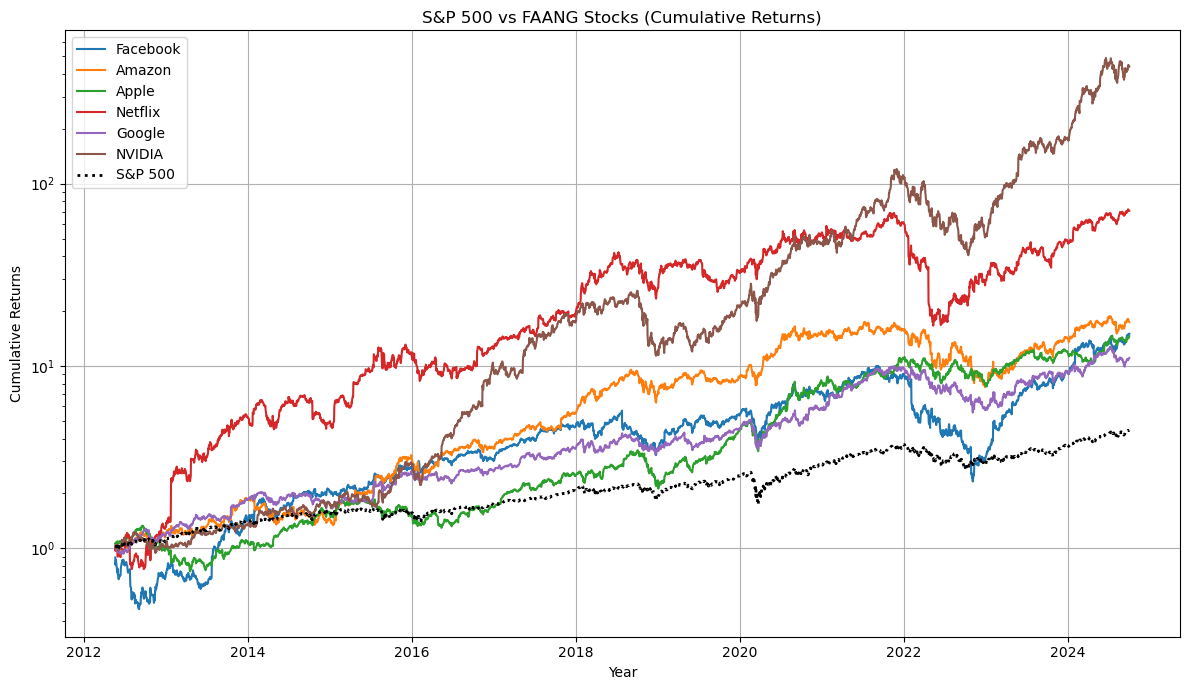

In [4]:
# Plotting
plt.figure(figsize=(12,7))

for company in tech_companies:
    plt.plot(cumulative_returns[company], label=company)
plt.plot(cumulative_returns['S&P 500'], label='S&P 500', color='black', linestyle=':', linewidth=2)

plt.title('S&P 500 vs FAANG Stocks (Cumulative Returns)')
plt.xlabel('Year')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.yscale('log') # Better visualization of returns
plt.grid(True)
plt.tight_layout()
plt.show()

From this graph we readily note a few features:
1. The ascendancy of Nvidia in the wake of the AI revolution
    1. Referring to the previous notebook we note that ChatGPT launched around 2021-2022 and we can see Nvidia crosses the threshold to top cumulative returns around that same point. Their chipsets powering the most hyped technological innovation since the internet.
2. All tech stocks have consistently outperformed the S&P $500$ since $2015$
3. Volatility during the covid era:
    1. Notable downswing at beginning of covid in $2020$
    2. Even greater downswing coinciding with the Fed raising interest rates and subsequent inflation surge in $2022$
4. Summary: FAAN(N)G stocks have consistently outperformed the S&P $500$, but exhibited much greater volatility and response to market conditions changing. A phenomena we will dive deeper into in the next chapter of the analysis...